In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name
case = 'Coupled Ridge'

# # path to ocean month file
# path_month = '/data/darr/MOM6_cases/aquaplanet/coupled-xgrid/502yr/05010101.ocean_month.nc'
# dm = xr.open_dataset(path_month, decode_times=True)

# path to ocean month file
path_month = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ocean_month.nc'
dm = xr.open_dataset(path_month, decode_times=True)

# path to ice month file
path_month_ice = '/data/sragen/aquaplanet/COUPLED/DATA/14yr/00090101.ice_month.nc'
dice = xr.open_dataset(path_month_ice, decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [8]:
dm

<xarray.Dataset>
Dimensions:     (Time: 60, nv: 2, xh: 180, xq: 181, yh: 89, yq: 90, zi: 21, zl: 20)
Coordinates:
  * xq          (xq) float64 0.0 2.0 4.0 6.0 8.0 ... 354.0 356.0 358.0 360.0
  * yh          (yh) float64 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * Time        (Time) object 0009-01-16 12:00:00 ... 0013-12-16 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * yq          (yq) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * zl          (zl) float64 125.0 375.0 625.0 ... 4.375e+03 4.625e+03 4.875e+03
  * zi          (zi) float64 0.0 250.0 500.0 750.0 ... 4.5e+03 4.75e+03 5e+03
Data variables:
    T_adx_2d    (Time, yh, xq) float32 ...
    T_ady_2d    (Time, yq, xh) float32 ...
    T_adx       (Time, zl, yh, xq) float32 ...
    T_ady       (Time, zl, yq, xh) float32 ...
    S_adx_2d    (Time, yh, xq) float32 ...
    S_ady_2d    (Time, yq, xh) float32 ...
    umo         (Time, zl, yh, xq) float32 ...
    vmo         (Time, zl, yq, xh) float32 ...
    thetao      (Time, zl, yh, xh) float32 ...
    tos         (Time, yh, xh) float32 ...
    so          (Time, zl, yh, xh) float32 ...
    sos         (Time, yh, xh) float32 ...
    ssh         (Time, yh, xh) float32 ...
    u           (Time, zl, yh, xq) float32 ...
    v           (Time, zl, yq, xh) float32 ...
    e           (Time, zi, yh, xh) float32 ...
    temp        (Time, zl, yh, xh) float32 ...
    salt        (Time, zl, yh, xh) float32 ...
    wd          (Time, zi, yh, xh) float32 ...
    uh          (Time, zl, yh, xq) float32 ...
    vh          (Time, zl, yq, xh) float32 ...
    uhml        (Time, zl, yh, xq) float32 ...
    vhml        (Time, zl, yq, xh) float32 ...
    uhGM        (Time, zl, yh, xq) float32 ...
    vhGM        (Time, zl, yq, xh) float32 ...
    taux        (Time, yh, xq) float32 ...
    tauy        (Time, yq, xh) float32 ...
    ustar       (Time, yh, xh) float32 ...
    SW          (Time, yh, xh) float32 ...
    LwLatSens   (Time, yh, xh) float32 ...
    p_surf      (Time, yh, xh) float32 ...
    salt_flux   (Time, yh, xh) float32 ...
    average_T1  (Time) object ...
    average_T2  (Time) object ...
    average_DT  (Time) timedelta64[ns] ...
    Time_bnds   (Time, nv) timedelta64[ns] ...
Attributes:
    filename:   00090101.ocean_month.nc
    title:      $name
    grid_type:  regular
    grid_tile:  N/A

In [9]:
def plot_surface(case, name):
    sst = case['tos'].mean(dim='Time')
    sss = case['sos'].mean(dim='Time')
    ssh = case['ssh'].mean(dim='Time')

    b = np.linspace(-2, 30, 21, endpoint=True)
    t = np.linspace(-2, 30, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sst, b, 
             cmap='magma', extend='both',transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[$^\circ$C]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SST.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sst, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[C]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SST'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SST_section.png')
    plt.show()

    b_salt = np.linspace(34, 36, 21, endpoint=True)
    t_salt = np.linspace(34, 36, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], sss, b_salt, 
             cmap='BrBG_r', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[psu]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()

    plt.subplots(figsize=(8,5))
    plt.plot(case['yh'], np.nanmean(sss, axis=1), linewidth=2, label='Global Mean')
    plt.ylabel('[psu]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    plt.title('{} SSS'.format(name), fontsize=16)
    plt.grid()
    plt.legend()
    # plt.savefig(fig_path+'SSS_section.png')
    plt.show()

    b_ssh = np.linspace(-10, 10, 21, endpoint=True)
    t_ssh = np.linspace(-10, 10, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(case['xh'], case['yh'], ssh, b_ssh, 
             cmap='PRGn', extend='both', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t_ssh, boundaries=t_ssh, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[m]', fontsize=14)
    plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    plt.title('{} SSH'.format(name), fontsize=16)
    # plt.savefig(fig_path+'SSS.png')
    plt.show()
    return


def calculate_global_sfn(vmo, vhGM):
    vmo_slice = (np.nanmean(vmo[-31:-1,:,:,:], axis=0))
    vhGM_slice = (np.nanmean(vhGM[-31:-1,:,:,:], axis=0))
    sfn_global_resmean = (np.cumsum(np.nansum(vmo_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_res = (np.cumsum(np.nansum(vhGM_slice/1025, axis=2), axis=0))/(1e6)
    sfn_global_mean = sfn_global_resmean - sfn_global_res
    return sfn_global_mean, sfn_global_res, sfn_global_resmean

def variablename(*arg):
    names = []
    for i in range(len(arg)):
        item = [tpl[0] for tpl in filter(lambda x: arg[i] is x[1], globals().items())]
        names.append(item)
    str(names).strip('[]')
    return names

def plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, y_south, y_north):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    sname = str(names[2]).strip("['']")
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dm.yq, dm.zl, sfn_list[row], b, cmap='RdBu_r', extend='both')
        ax.invert_yaxis()
        ax.set_xlim(-np.abs(y_south), y_north)
        plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
#     plt.savefig(fig_path+'{}_global.png'.format(sname))
    plt.show()
    return


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


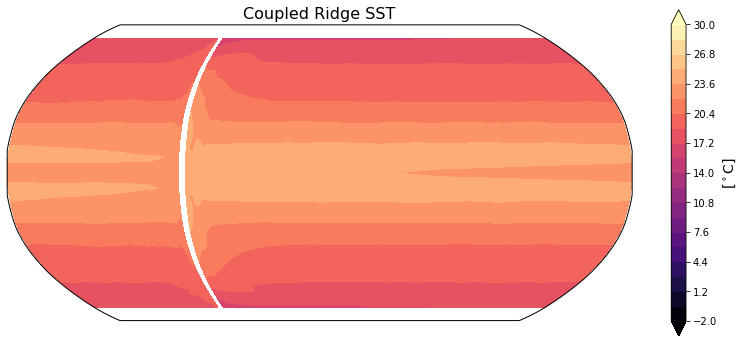

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


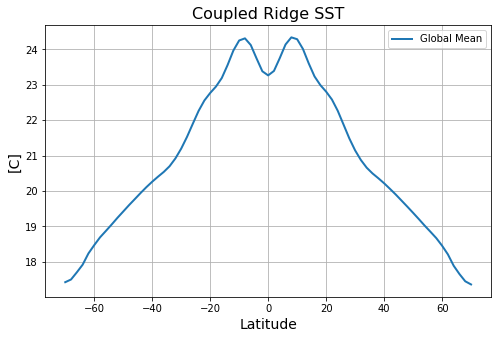

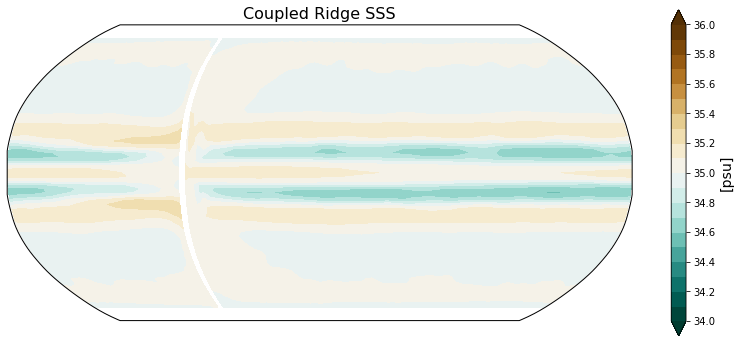

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


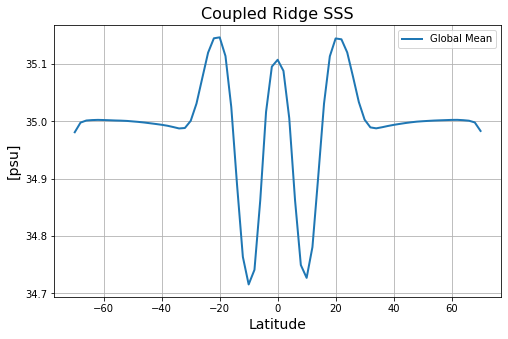

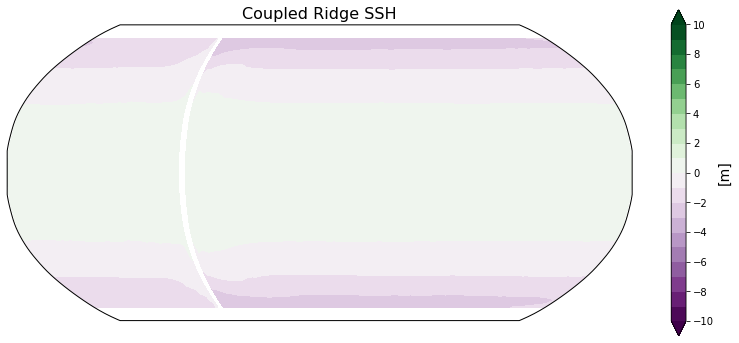

In [10]:
plot_surface(dm, case)

In [11]:
# Calculate global mean, residual, and residual mean overturning streamfunction
sfn_mean, sfn_res, sfn_resmean = calculate_global_sfn(dm.vmo, dm.vhGM)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice


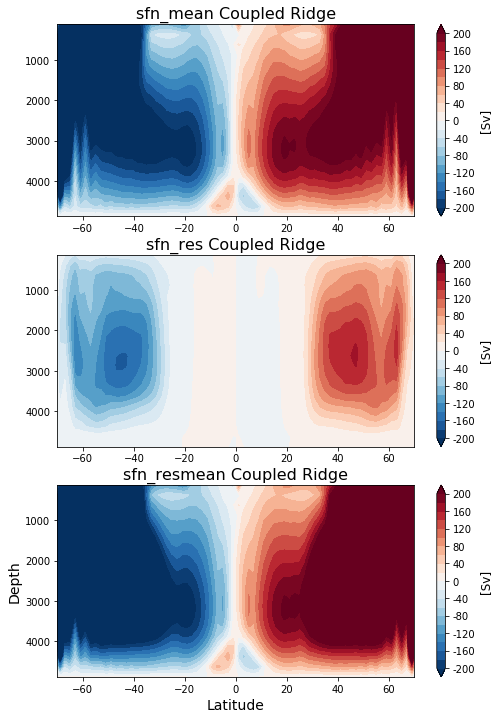

In [12]:
# Plot global mean, residual, and residual mean overturning streamfunction
plot_global_sfn(sfn_mean, sfn_res, sfn_resmean, 200, -70, 70)


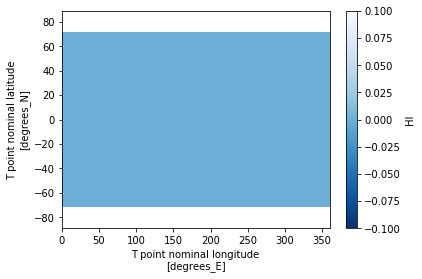

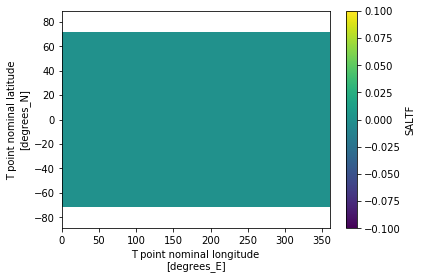

In [13]:
dice.HI.mean(dim='time').plot(cmap='Blues_r'); plt.show()

dice.SALTF.mean(dim='time').plot(); plt.show()